# Do you dream to become a datascientist? Here All what you should know about your dream job


If you think of becoming a data scientist and you don’t know how to break into the field, several questions have probably come into your mind, in particular:

- What is the educational background of data scientists compared to different developers?
- What are the most used programming languages by a data scientist?
- How is the gender distribution among data Scientists, compared to other developer types?
- Who earns more, data scientists or other software developers?
- Are data Scientists more satisfied with their job compared to other developers?

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#unders">I- Data Understanding and Preparation</a></li>
<li><a href="#eda">II- Exploratory Data Analysis </a></li>  
<li><a href="#concl">Conclusion</a></li>
</ul>

## I- Data Understanding and Preparation

First, let's read in the necessary libraries and datasets.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import defaultdict

pd.set_option('display.max_rows', None)
sb.set_theme()

%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# Size of graphics
sb.set_style("white")
plt.rcParams['figure.figsize'] = (10, 5)
# plt.rcParams['font.size'] = 20
plt.rcParams["axes.grid"] = False
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Change pandas viewing options
# Size of graphics
plt.rcParams["axes.grid"] = False
plt.style.use('default')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 1- Survey 2020

In [2]:
schema_20=pd.read_csv('developer_survey_2020/survey_results_schema.csv')

In [3]:
df_20=pd.read_csv('developer_survey_2020/survey_results_public.csv')

In [4]:
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [5]:
print("Our dataset has", df_20.shape[0],"rows and", df_20.shape[1],"columns")

Our dataset has 64461 rows and 61 columns


In [6]:
list(df_20)

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

In [7]:
schema_20.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


### Cleaning Data

There are some issues that need to be handled.

#### `Drop unnecessary columns or columns with high pourcentage of missing values`

In [8]:
# Checking the percentage of missing values
df_20.isnull().mean() * 100

Respondent                       0.000000
MainBranch                       0.463846
Hobbyist                         0.069810
Age                             29.498456
Age1stCode                      10.178247
CompFreq                        37.839934
CompTotal                       45.973534
ConvertedComp                   46.082127
Country                          0.603466
CurrencyDesc                    29.458122
CurrencySymbol                  29.458122
DatabaseDesireNextYear          31.633080
DatabaseWorkedWith              23.151983
DevType                         23.411055
EdLevel                         10.905819
Employment                       0.941655
Ethnicity                       28.719691
Gender                          21.569631
JobFactors                      23.443633
JobSat                          29.889390
JobSeek                         19.754580
LanguageDesireNextYear          16.053117
LanguageWorkedWith              10.988039
MiscTechDesireNextYear          34

#### `Handling different values in Developertype column`

In [9]:
df_20.DevType.str.split(';').explode().value_counts()

Developer, back-end                              27228
Developer, full-stack                            27125
Developer, front-end                             18296
Developer, desktop or enterprise applications    11784
Developer, mobile                                 9482
DevOps specialist                                 5969
Database administrator                            5722
Designer                                          5321
System administrator                              5242
Developer, embedded applications or devices       4750
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Developer, QA or test                             3947
Engineer, data                                    3738
Academic researcher                               3552
Educator                                          2928
Developer, game or graphics                       2789
Engineering manager                               2724
Product ma

In [10]:
df_20.DevType.str.split(';').explode().unique()

array(['Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', nan, 'Designer',
       'Developer, front-end', 'Developer, back-end',
       'Developer, QA or test', 'DevOps specialist',
       'Developer, game or graphics', 'Database administrator',
       'Developer, embedded applications or devices', 'Engineer, data',
       'Educator', 'System administrator', 'Engineering manager',
       'Product manager', 'Data or business analyst',
       'Academic researcher',
       'Data scientist or machine learning specialist', 'Scientist',
       'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or sales professional'], dtype=object)

In [11]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [12]:
def clean_and_plot(df, column_name, possible_vals, title, plot=True, percentage=True):
    '''
    INPUT 
        df - a dataframe holding the column to clean
        column_name - the question that has multiple possible answers
        possible_vals - a list with the possible answers for that question
        title - string of the plot title
        axis - axis object
        plot - bool providing whether or not you want a plot back
        percentage - bool providing whether we want the result as a percentage or a total count
        
    OUTPUT
        new_df - a dataframe with the percentage of the individuals per possible answer
        Displays a plot for the column.
    '''
    
    col = df_20[column_name].value_counts().reset_index()
    col.rename(columns={'index': 'type', column_name: 'count'}, inplace=True)
    count_df = total_count(col, 'type', 'count', possible_vals)

    count_df.set_index('type', inplace=True)
    if plot:
        if percentage:
            (count_df/df.shape[0]).plot(kind='barh', legend=None)
        else:
            count_df.plot(kind='barh', legend=None);
        plt.title(title);
        plt.gca().invert_yaxis()
        plt.show()
    if percentage:
          new_df = count_df/df_20.shape[0]
    else:
        new_df = count_df
    new_df.index.name = None
    return new_df

In [13]:
devttype_vals = ["Academic Researcher", "Data or business analyst", "Data scientist or machine learning specialist",
                 "Database administrator", "Designer", "Developer, full-stack", "Developer, back-end", 
                 "Developer, front-end", "Developer, mobile", "Developer, desktop or enterprise applications",
                 "Developer, embedded applications or devices", "Developer, QA or test", "DevOps specialist",
                 "Developer, game or graphics", "Educator", "Engineering manager", "Engineer, data",
                 "Engineer, site reliability", "Marketing or sales professional", "Product manager", "Scientist",
                 "Senior Executive (CSuite, VP, etc.)", "Student", "System administrator", "Other"]

devtype_df = clean_and_plot(df_20,'DevType', devttype_vals, "Developer Type", plot=False, percentage=False)   
devtype_df

,count
"Developer, back-end",27228
"Developer, full-stack",27125
"Developer, front-end",18296
"Developer, desktop or enterprise applications",11784
"Developer, mobile",9482
DevOps specialist,5969
Database administrator,5722
Designer,5321
System administrator,5242
"Developer, embedded applications or devices",4750


#### `Handling different values in Language Worked With column`

In [14]:
df_20.LanguageWorkedWith.str.split(';').explode().unique()

array(['C#', 'HTML/CSS', 'JavaScript', 'Swift', 'Objective-C', 'Python',
       nan, 'Ruby', 'SQL', 'Java', 'PHP', 'C', 'TypeScript',
       'Bash/Shell/PowerShell', 'Kotlin', 'R', 'VBA', 'Perl', 'Scala',
       'C++', 'Go', 'Haskell', 'Rust', 'Dart', 'Julia', 'Assembly'],
      dtype=object)

In [15]:
languages_vals = ['C#', 'HTML/CSS', 'JavaScript', 'Swift', 'Objective-C', 'Python',
       'nan', 'Ruby', 'SQL', 'Java', 'PHP', 'C', 'TypeScript',
       'Bash/Shell/PowerShell', 'Kotlin', 'R', 'VBA', 'Perl', 'Scala',
       'C++', 'Go', 'Haskell', 'Rust', 'Dart', 'Julia', 'Assembly']

languages_df= clean_and_plot(df_20,'LanguageWorkedWith', languages_vals, "LanguagesType", plot=False, percentage=False)   
languages_df

,count
C,46769
Java,45749
JavaScript,38822
HTML/CSS,36181
SQL,31413
Python,25287
Bash/Shell/PowerShell,18980
C#,18041
PHP,15007
TypeScript,14578


In [16]:
df_20.LanguageWorkedWith.unique()

array(['C#;HTML/CSS;JavaScript', 'JavaScript;Swift',
       'Objective-C;Python;Swift', ...,
       'Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;JavaScript;Kotlin;Python;Ruby;Rust;SQL',
       'Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScript;Kotlin;PHP;SQL;VBA',
       'Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift'],
      dtype=object)

#### `Handling Education Level column`

In [17]:
df_20.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [18]:
# Define mapping to new 'EdLevel' categories
ed_level_dict = {'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary school', 
                 'Secondary school ' : 'Secondary school',
                 'Some college/university study without earning a degree' : "Some college/university study without degree", 
                 'Associate degree (A.A., A.S., etc.)' : "Some college/university study without degree", 
                 'Associate degree' : "Some college/university study without degree", 
                 "Bachelor’s degree (B.A., B.S., B.Eng., etc.)" : "Bachelor's degree",  
                 "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" : "Master's degree",
                 "Professional degree (JD, MD, etc.)" : "Professional degree", 
                 "Other doctoral degree (Ph.D., Ed.D., etc.)" : "Doctoral degree"
                }

df_20.EdLevel = df_20.EdLevel.replace(ed_level_dict)
df_20.EdLevel.value_counts()

Bachelor's degree                               26542
Master's degree                                 13112
Some college/university study without degree     9082
Secondary school                                 4771
Doctoral degree                                  1690
Primary/elementary school                         941
Professional degree                               800
I never completed any formal education            493
Name: EdLevel, dtype: int64

#### `Handling Undergrad Major column`

In [19]:
df_20.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

In [20]:
# Define categories to merge
undergrad_dict = {
    "A humanities discipline (ex. literature, history, philosophy)" : "A humanities or arts discipline", 
    "A humanities discipline (such as literature, history, philosophy, etc.)" : "A humanities or arts discipline",
    "A humanities discipline" : "A humanities or arts discipline",
    "A social science (ex. anthropology, psychology, political science)" : "A social science",
    "A social science (such as anthropology, psychology, political science, etc.)" : "A social science",
    "Psychology" : "A social science",
    "A business discipline (ex. accounting, finance, marketing)" : "A business discipline",
    "A business discipline (such as accounting, finance, marketing, etc.)" : "A business discipline",
    "A natural science (ex. biology, chemistry, physics)" : "A natural or health science",
    "A natural science (such as biology, chemistry, physics, etc.)" : "A natural or health science",
    "A natural science" : "A natural or health science",
    "Fine arts or performing arts (ex. graphic design, music, studio art)" : "A humanities or arts discipline",
    "Fine arts or performing arts (such as graphic design, music, studio art, etc.)" : "A humanities or arts discipline",
    "Fine arts or performing arts" : "A humanities or arts discipline",
    "A health science (ex. nursing, pharmacy, radiology)" : "A natural or health science",
    "A health science (such as nursing, pharmacy, radiology, etc.)" : "A natural or health science",
    "A health science" : "A natural or health science",
    "Another engineering discipline (ex. civil, electrical, mechanical)" : "Another engineering discipline",
    "Another engineering discipline (such as civil, electrical, mechanical, etc.)" : "Another engineering discipline",
    "A non-computer-focused engineering discipline" : "Another engineering discipline",
    "Information systems, information technology, or system administration" : "Information technology, networking, or system administration",
    "Management information systems" : "Information technology, networking, or system administration",
    "Computer science or software engineering" : "Computer science, computer engineering, or software engineering",
    "Computer engineering or electrical/electronics engineering" : "Computer science, computer engineering, or software engineering",
    "Computer programming or Web development" : "Web development or web design",
    "Something else" : np.nan
}

# Merge categories
df_20.UndergradMajor = df_20.UndergradMajor.replace(undergrad_dict)

#List value counts for new categories
df_20.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering    31582
Another engineering discipline                                      4754
Information technology, networking, or system administration        4071
A natural or health science                                         2457
Mathematics or statistics                                           1849
Web development or web design                                       1789
A humanities or arts discipline                                     1732
A business discipline                                               1375
A social science                                                     933
I never declared a major                                             453
Name: UndergradMajor, dtype: int64

##### Handling gender column different values

In [21]:
df_20.Gender.value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

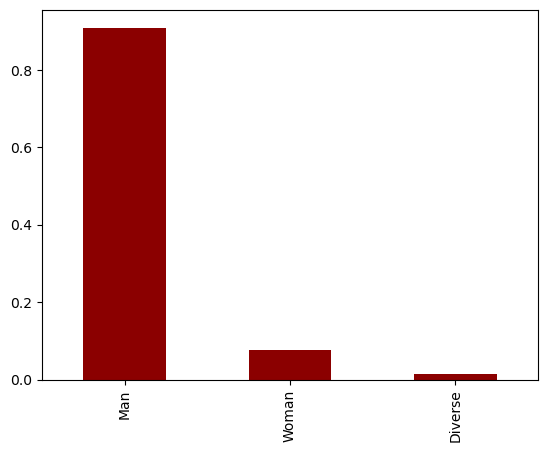

In [22]:
diverse = ((df_20.Gender != 'Man') & (df_20.Gender != 'Male') & 
           (df_20.Gender != 'Woman') & (df_20.Gender != 'Female') & 
           (df_20.Gender.notna()))
df_20.loc[diverse, 'Gender'] = 'Diverse'

# Replace 'Male'/'Female' values in by 'Man'/'Woman'
df_20.Gender = df_20.Gender.replace({'Male' : 'Man', 'Female' : 'Woman'})

# Visualize cleaned 'Gender' distribution
df_20.Gender.value_counts(normalize=True).plot(kind='bar', color='darkred');

#### `Convert Yearscode column to int`

In [23]:
df_20.YearsCodePro.value_counts()

3                     4815
2                     4814
5                     3978
4                     3716
1                     2818
6                     2741
10                    2735
8                     2234
7                     2229
Less than 1 year      2174
15                    1531
12                    1460
20                    1416
9                     1232
11                     947
13                     904
14                     758
16                     624
25                     583
18                     533
17                     475
22                     444
19                     373
30                     370
21                     341
23                     321
24                     259
26                     180
35                     162
27                     149
28                     128
32                     103
40                     101
33                      93
31                      80
34                      79
29                      72
3

In [24]:
df_20['YearsCodePro']=df_20['YearsCodePro'].replace({'Less than 1 year' :'0.5', 'More than 50 years':'55'})

In [25]:
df_20['YearsCodePro'] = df_20['YearsCodePro'].astype(float)

##### Job satisfaction

In [26]:
df_20.JobSat.value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [27]:
# cat_job_sat_dict = {
#     'Very dissatisfied' : 1,
#     'Extremely dissatisfied' : 1,
#     'Moderately dissatisfied' : 1,
#     'Slightly dissatisfied' : 2,
#     'Neither satisfied nor dissatisfied' : 3,
#     'Slightly satisfied' : 4,
#     'Moderately satisfied' : 5,
#     'Very satisfied' : 5,
#     'Extremely satisfied' : 5
# }

# # Convert JobSat column for 2018 - 2020 data into 5-part numeric scalee
# df_20['JobSat'] = df_20.JobSat.map(cat_job_sat_dict)

In [28]:
# df_20['JobSat']= df_20['JobSat'].astype(float)

## II- Exploratory Data Analysis

Let's have a look at what the participants say about:

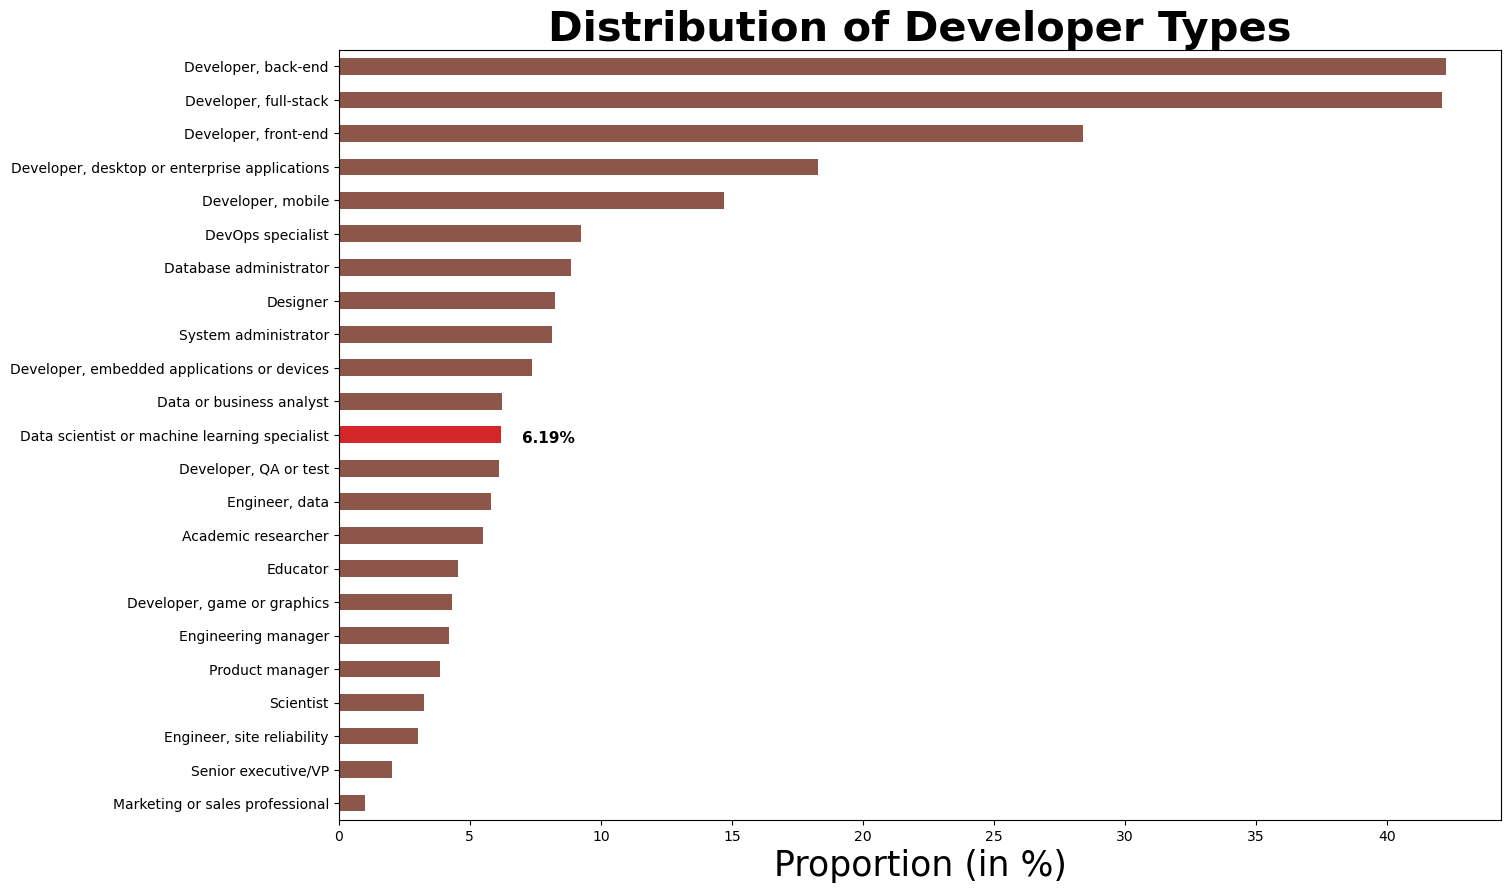

In [29]:
# Explode 'DevType' column to get proportion of all developer types for 2020
devtype_dist = df_20.DevType.str.split(';').explode().value_counts(
    normalize=True, dropna=False)*100

# Multiply by len/len(df)to take into account multiple rows for one respondent in exploded df
devtype_dist *= len(df_20.DevType.str.split(';').explode())/len(df_20)

# Drop NaN category from series
devtype_dist.drop(np.nan, inplace=True)

# Set different color for Data Scientist bar
colors = [sb.color_palette()[3] if x == 'Data scientist or machine learning specialist' 
          else sb.color_palette()[5] for x in devtype_dist.index]

# Get percentage for data scientists for annotation
data_scientist_percentage = devtype_dist['Data scientist or machine learning specialist']

# Visualize Proportion of Developer Types in 2020
plt.figure(figsize=(15,10))
ax = devtype_dist.plot(kind='barh', color=colors)
ax.invert_yaxis()
ax.annotate(f'{data_scientist_percentage:.2f}%', 
            (7,11.25), 
            fontweight='bold', 
            fontsize=11)
ax.set_title('Distribution of Developer Types', fontsize=30, weight='bold')
ax.set_xlabel('Proportion (in %)', fontsize=25);

In [30]:
devtype_dist 

Developer, back-end                              42.239494
Developer, full-stack                            42.079707
Developer, front-end                             28.383053
Developer, desktop or enterprise applications    18.280821
Developer, mobile                                14.709669
DevOps specialist                                 9.259863
Database administrator                            8.876685
Designer                                          8.254604
System administrator                              8.132049
Developer, embedded applications or devices       7.368797
Data or business analyst                          6.242534
Data scientist or machine learning specialist     6.186687
Developer, QA or test                             6.123082
Engineer, data                                    5.798855
Academic researcher                               5.510309
Educator                                          4.542281
Developer, game or graphics                       4.3266

In this work, i'm particulary interested about data scientist, so i will filter my dataset.

In [31]:
# Data scientists
df_ds = df_20[df_20['DevType'].str.contains("Data scientist",na=False)]
df_ds.shape

(3988, 61)

In [32]:
# Functions to compare the data scientists to all developers based on a column

def compare(df1, df2, column_name):
    '''
    INPUT 
        df1 - a dataframe related to data scientists
        df2 - a dataframe of all developers
        column_name - name of the column by which we want to compare the two dataframes
      
    OUTPUT
        compare_df - a dataframe with rows the values of the column_name and 2 columns, the data scientists and all the
                     respondents
    '''
    
    vals1 = df1[column_name].value_counts(normalize=True);
    vals2 = df2[column_name].value_counts(normalize=True);

    compare_df = vals1.rename('data').to_frame()\
               .join(vals2.rename('all').to_frame())

    return compare_df

In [33]:
def compare_plot(compare_df, plot_title):
    '''
    Prints a barplot comparing the columns of the compare_df.
    
    INPUT 
        compare_df - a dataframe related to data scientists
        plot_title - a dataframe of all developers
        parentheses - boolean to choose we want to keep parentheses in the xticks or not. This is helpful as some answers
                      are particulary long and are better displayed when omitting the parentheses

    OUTPUT
       None
    '''
    
    index = np.arange(compare_df.shape[0])
    bar_width = 0.25

    fig, ax = plt.subplots(figsize=(25, 20))


    ax.bar(index, compare_df['data'], bar_width,
                    label="Data Scientists", color='darkred')

    ax.bar(index+bar_width, compare_df['all'],
                     bar_width, label="All Developers",color='grey')
    

    ax.set_ylabel('Proportion (%)',fontsize=25)
    ax.set_title(plot_title, fontsize=30,  weight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(compare_df.index)
    ax.tick_params(axis='both', labelsize=25)
    ax.legend(fontsize=15, loc='best')
    plt.xticks(rotation=45)
#     ax.invert_yaxis()
    plt.show()

#### Main Branch of datascientists

In [34]:
main_branch_df = compare(df_ds, df_20, 'MainBranch')
main_branch_df.head()

,data,all
I am a developer by profession,0.719214,0.735529
"I am not primarily a developer, but I write code sometimes as part of my work",0.200453,0.085752
I am a student who is learning to code,0.048602,0.124217
I code primarily as a hobby,0.016872,0.036065
"I used to be a developer by profession, but no longer am",0.014858,0.018438


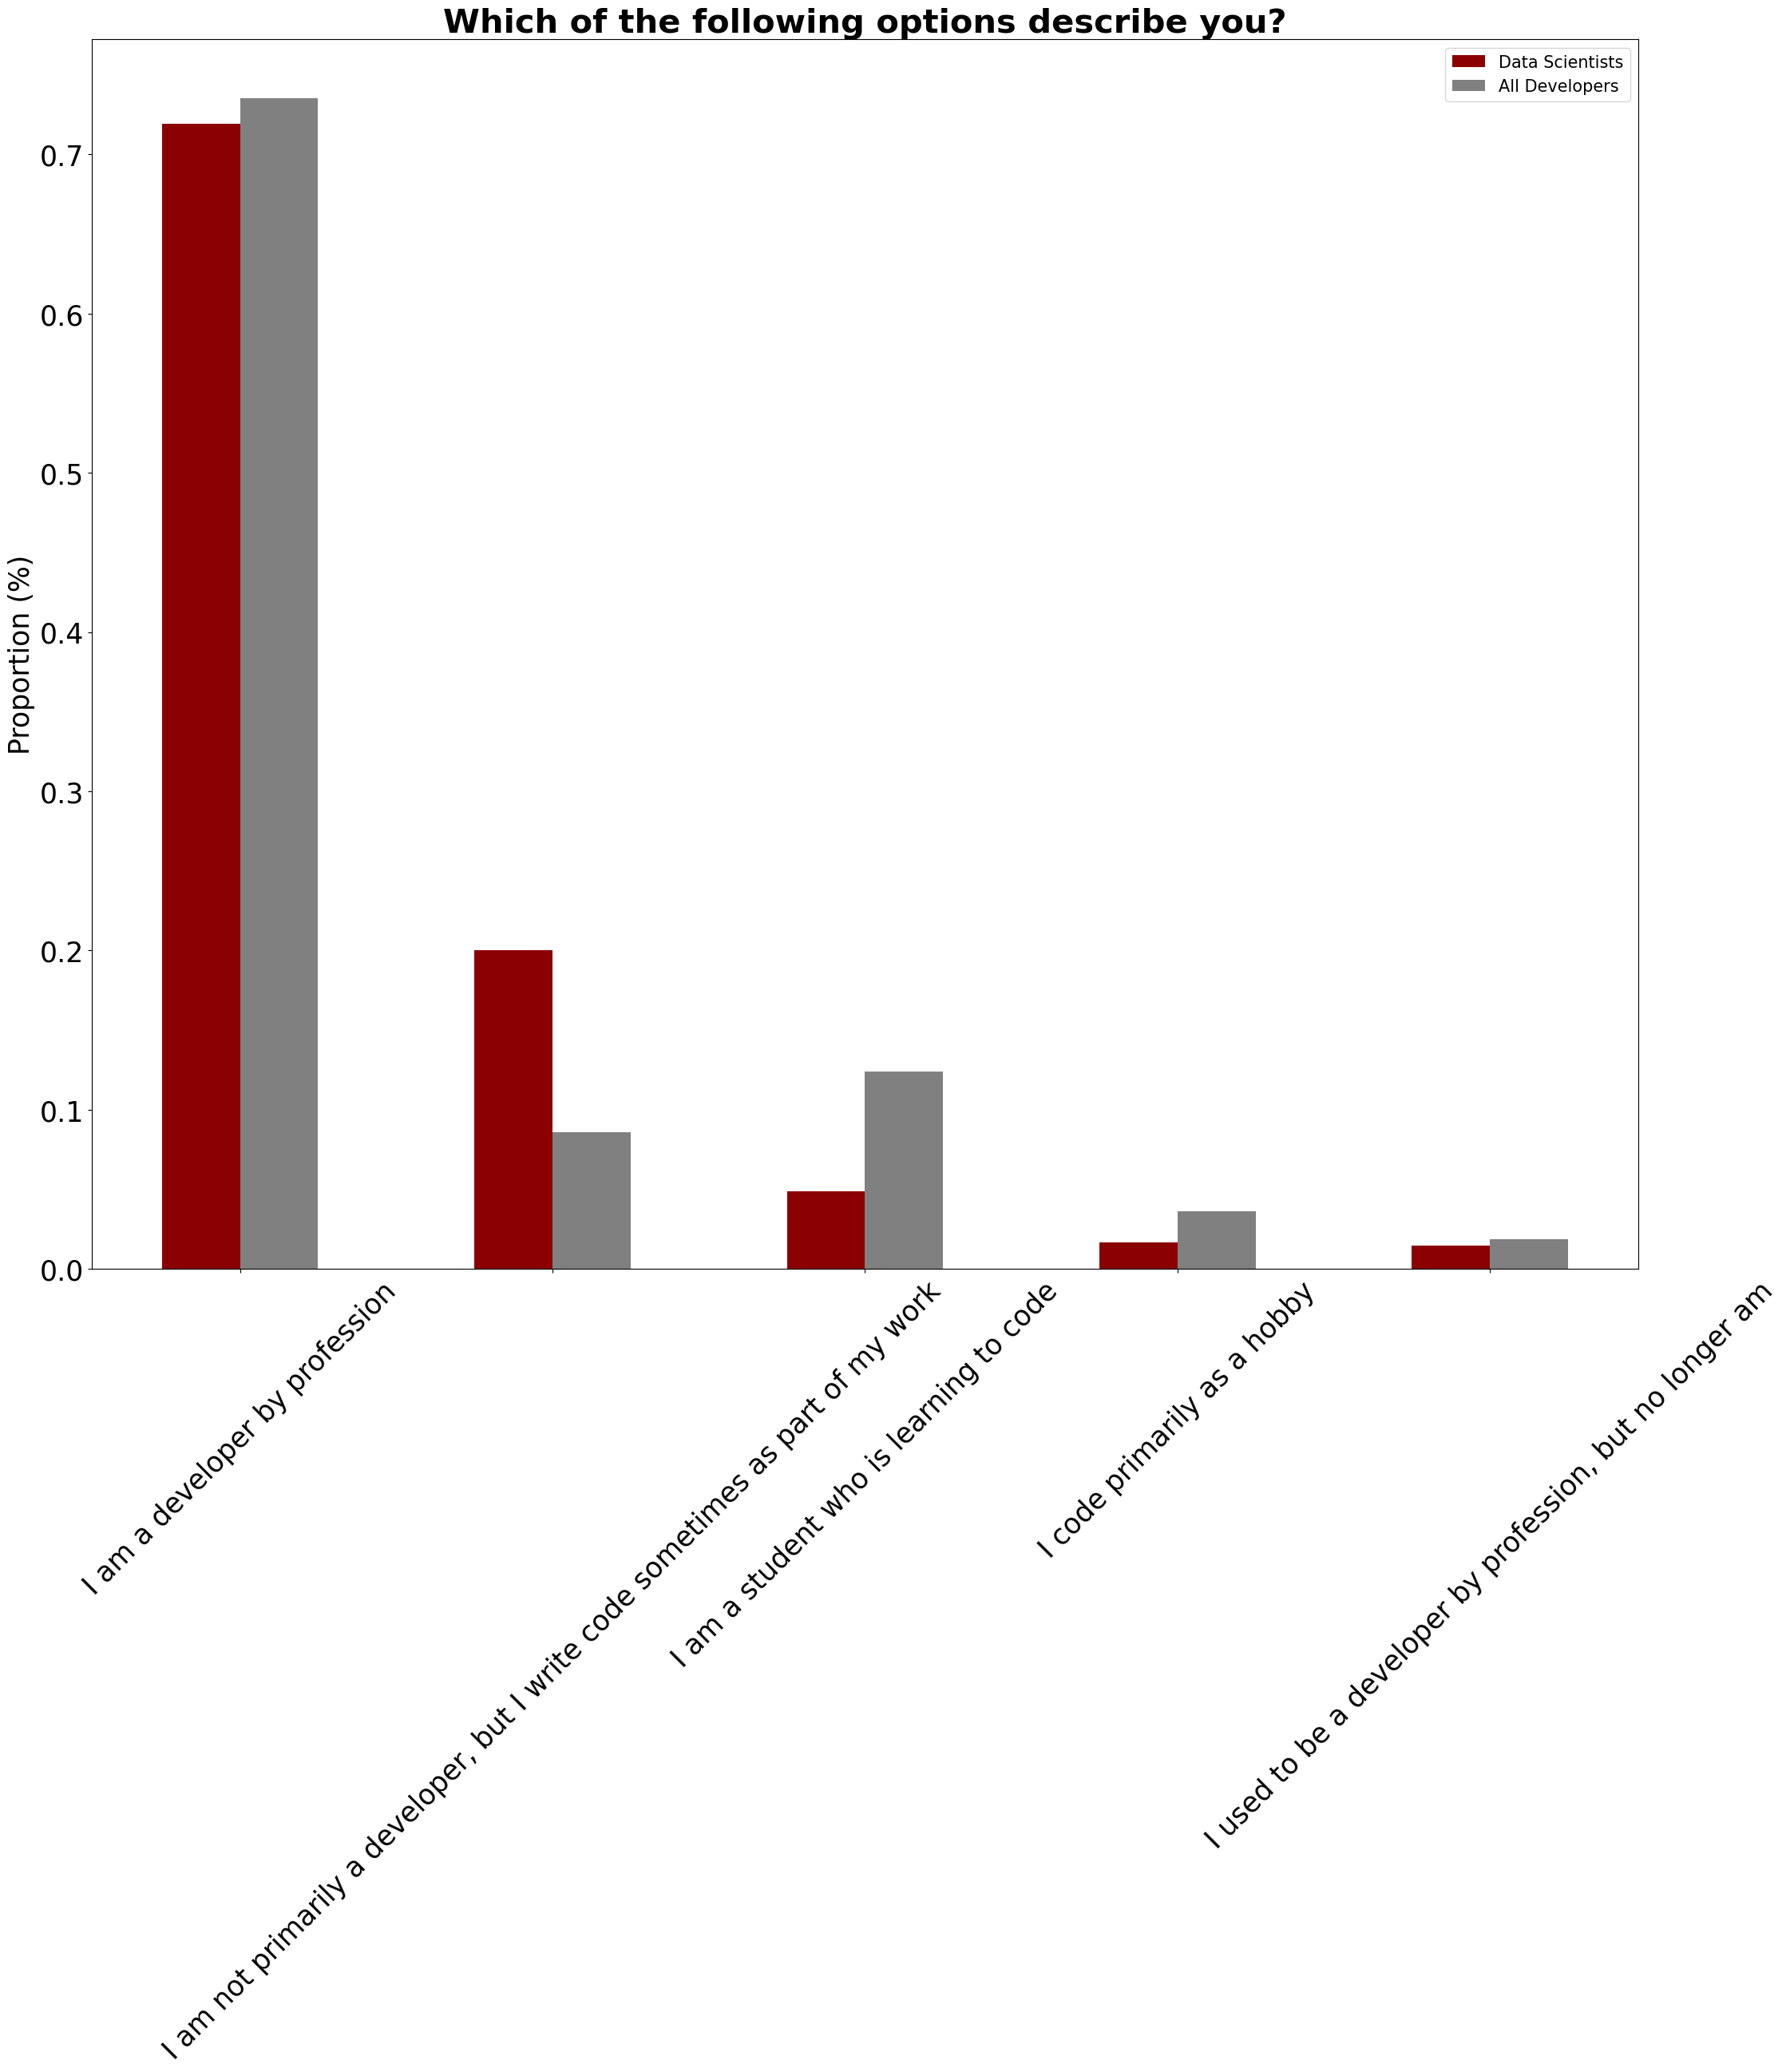

In [35]:
compare_plot(main_branch_df, "Which of the following options describe you?")

#### What is the Educational level of data scientists?

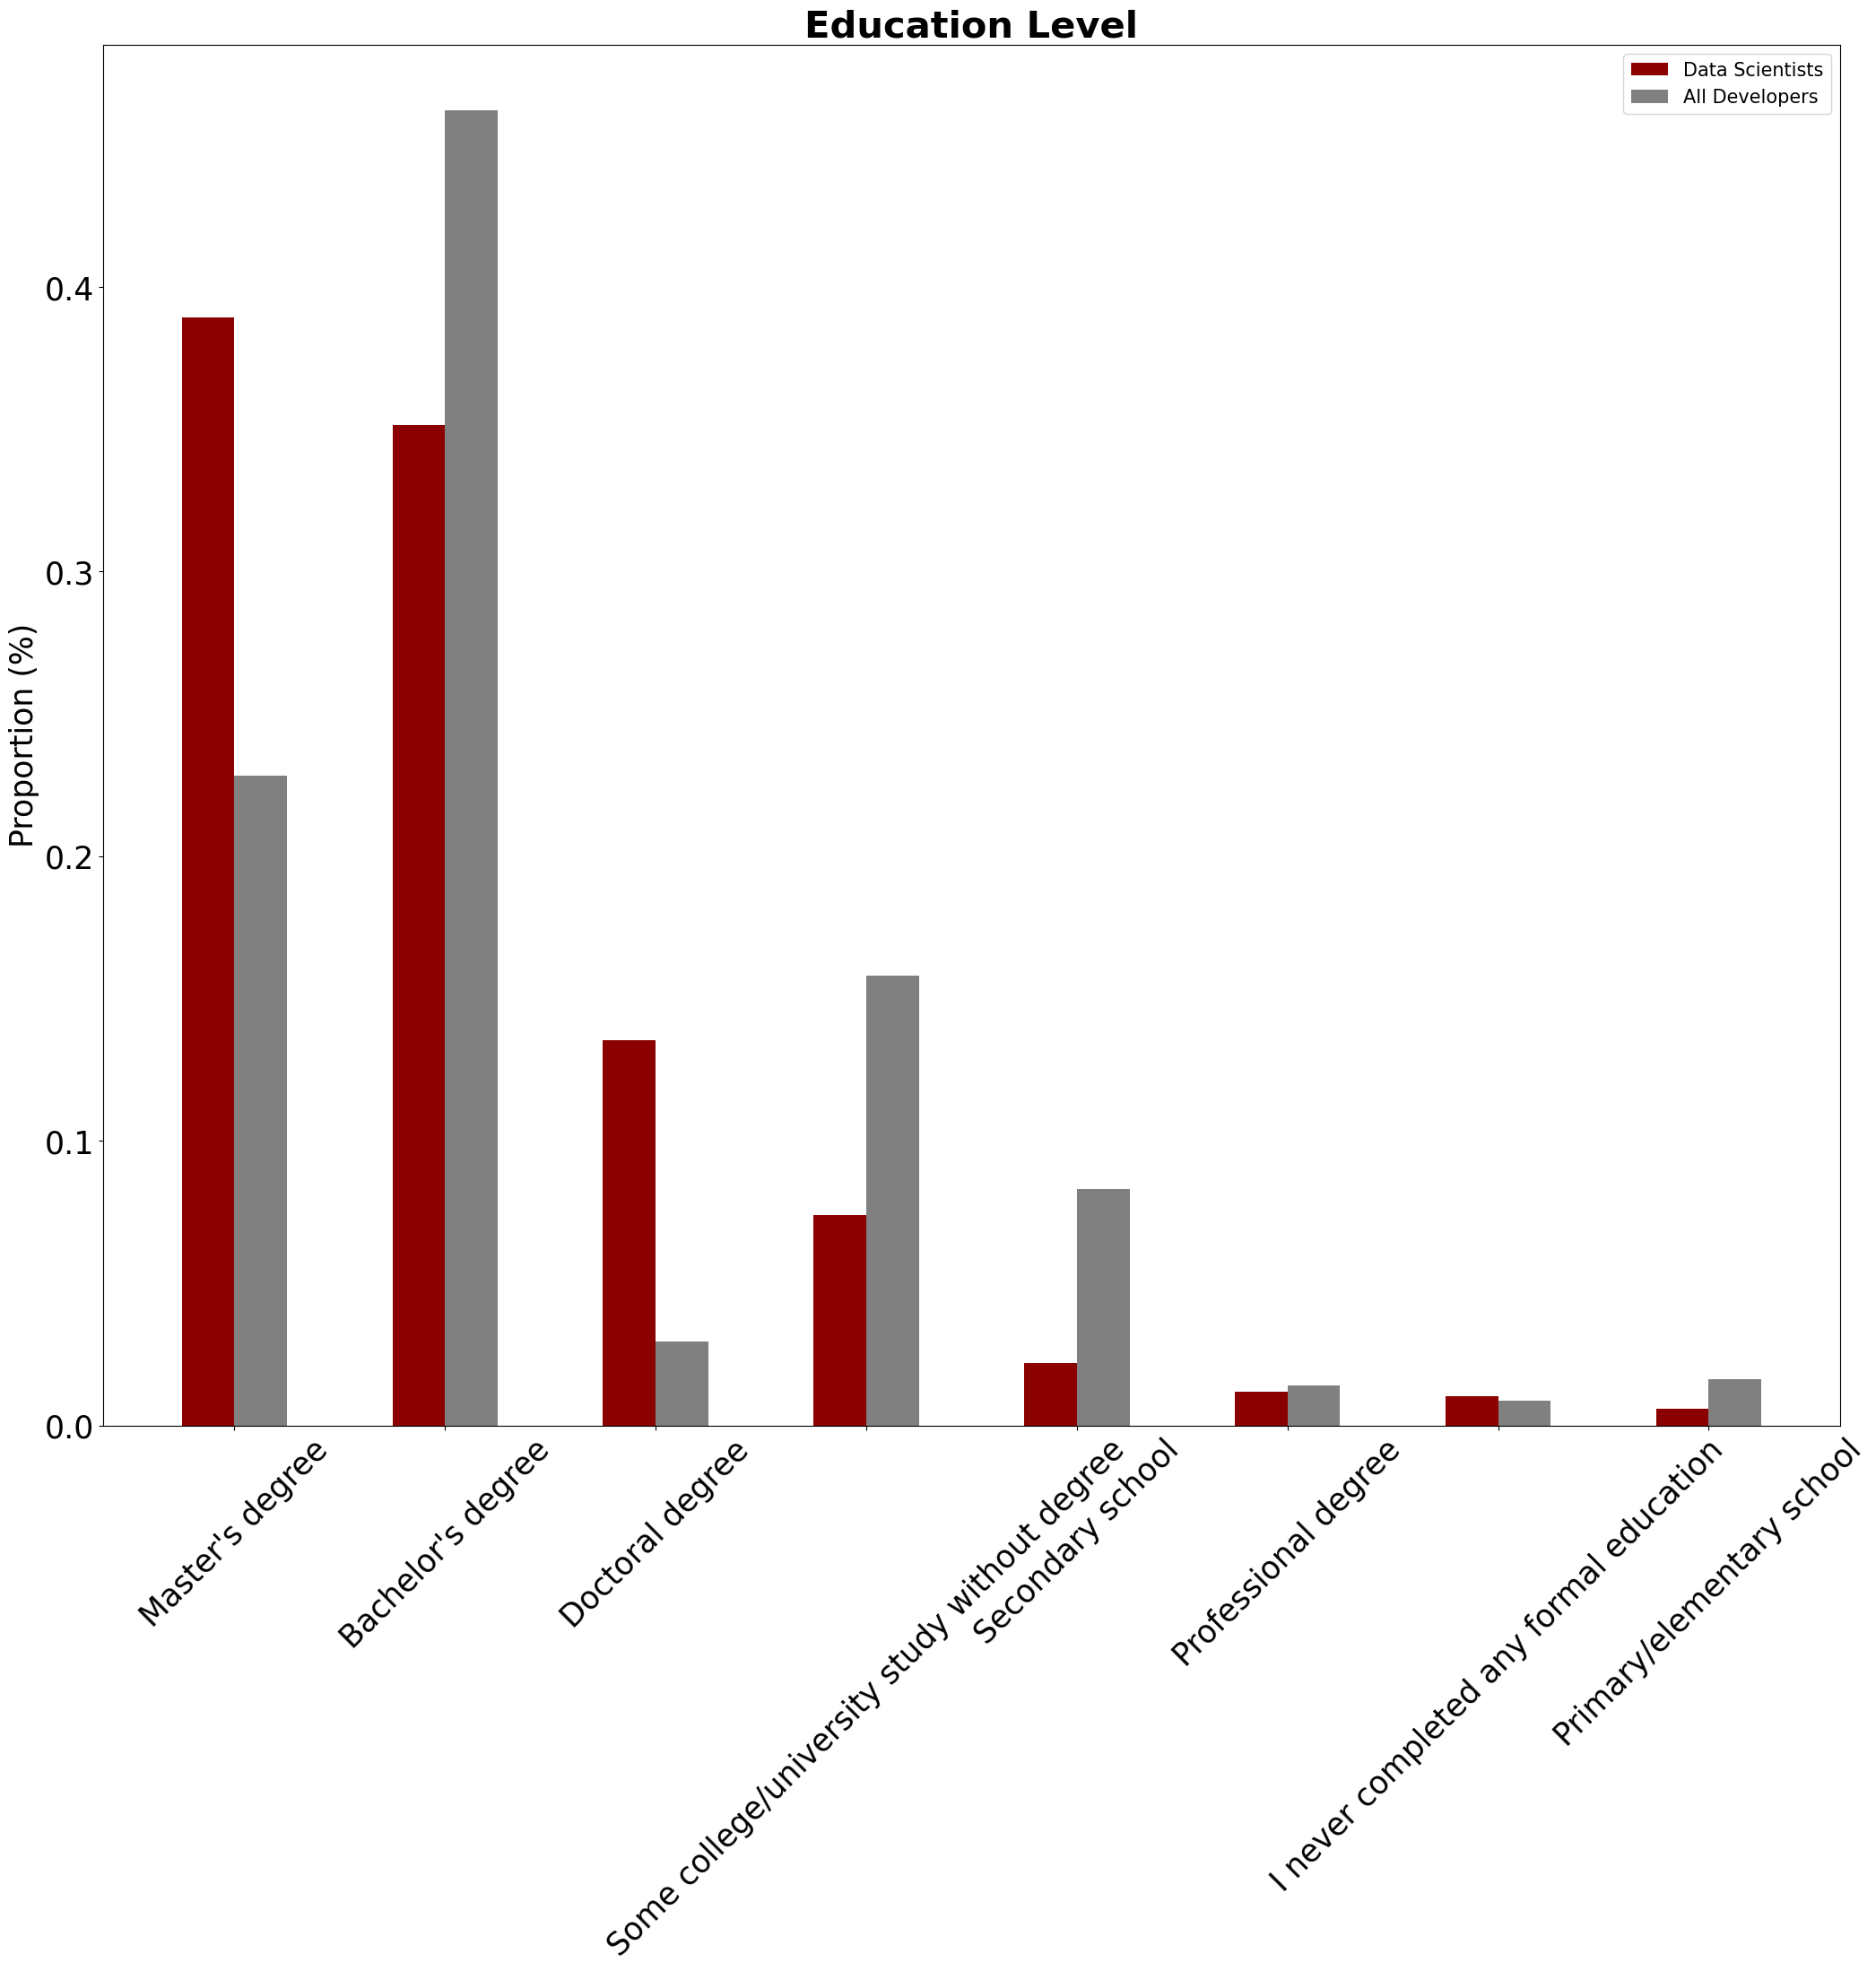

In [36]:
graph_df = compare(df_ds, df_20, 'EdLevel')
compare_plot(graph_df, 'Education Level')

In [37]:
graph_df

,data,all
Master's degree,0.389257,0.228309
Bachelor's degree,0.351578,0.462155
Doctoral degree,0.135438,0.029427
Some college/university study without degree,0.073829,0.158138
Secondary school,0.021894,0.083074
Professional degree,0.011965,0.013930
I never completed any formal education,0.010183,0.008584
Primary/elementary school,0.005855,0.016385


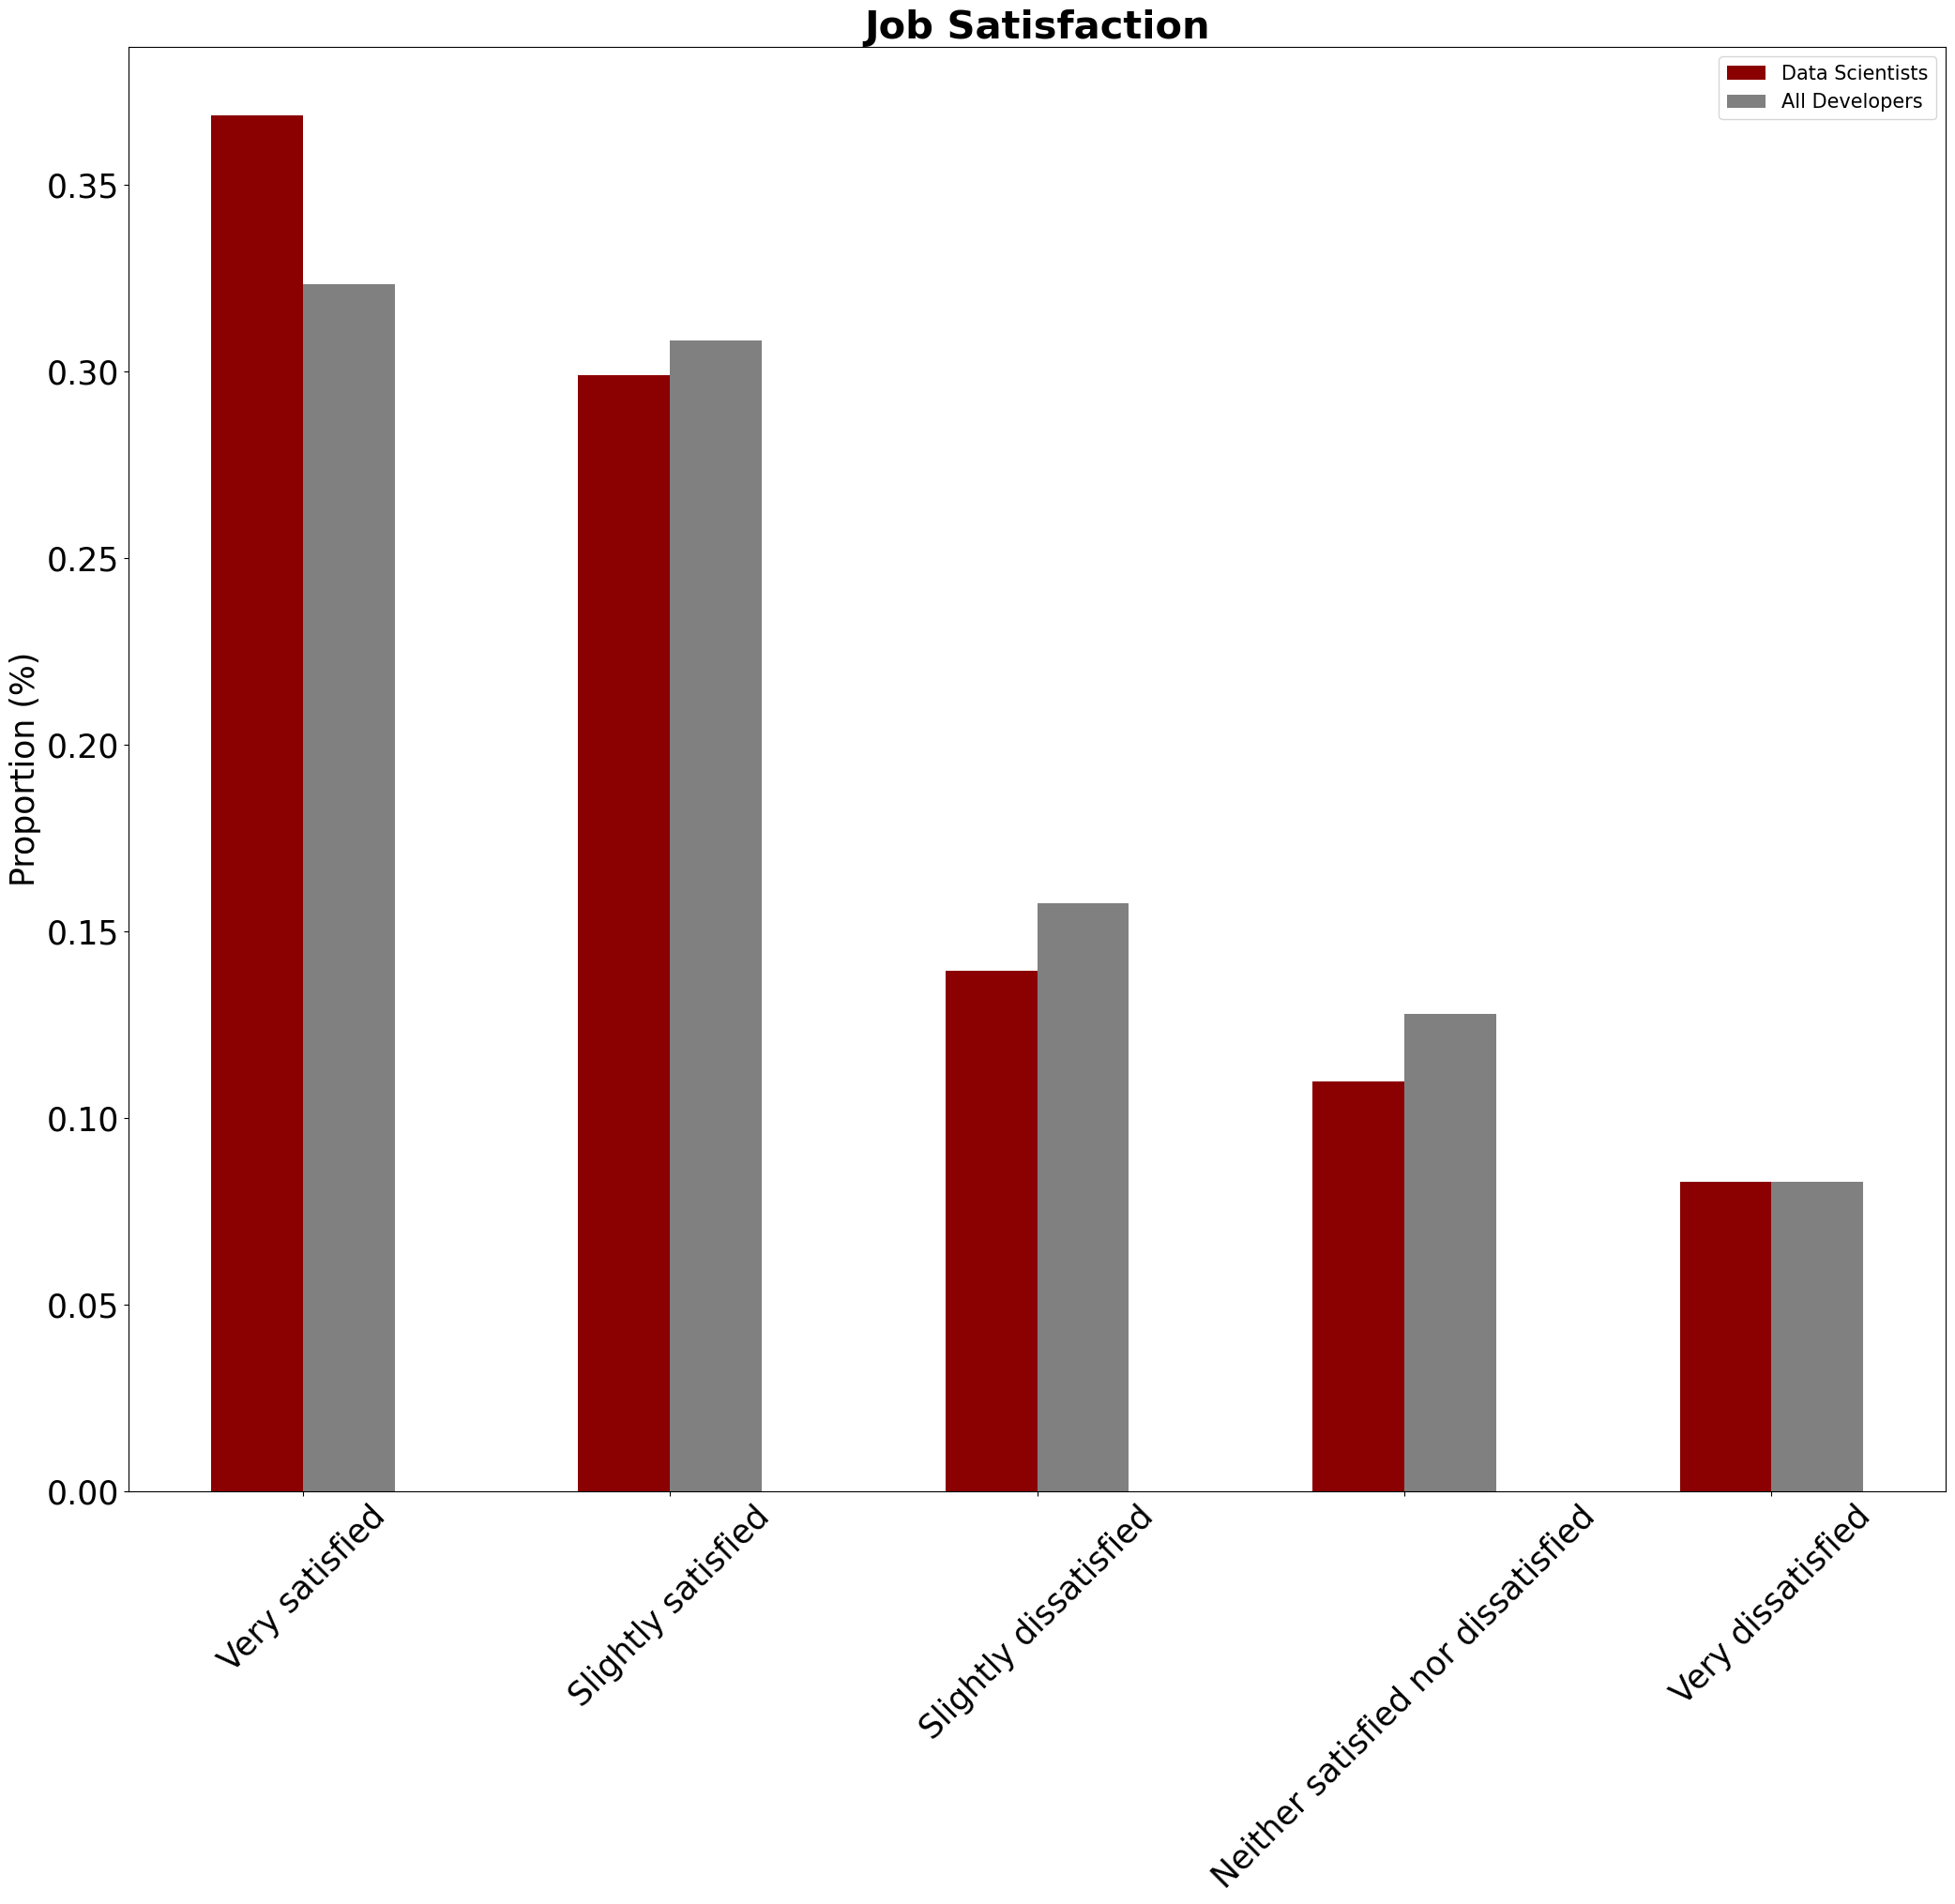

In [38]:
sat_df = compare(df_ds, df_20, 'JobSat')
compare_plot(sat_df, 'Job Satisfaction')

In [39]:
sat_df

,data,all
Very satisfied,0.368542,0.323295
Slightly satisfied,0.299082,0.308227
Slightly dissatisfied,0.139495,0.157632
Neither satisfied nor dissatisfied,0.109931,0.127959
Very dissatisfied,0.082951,0.082887


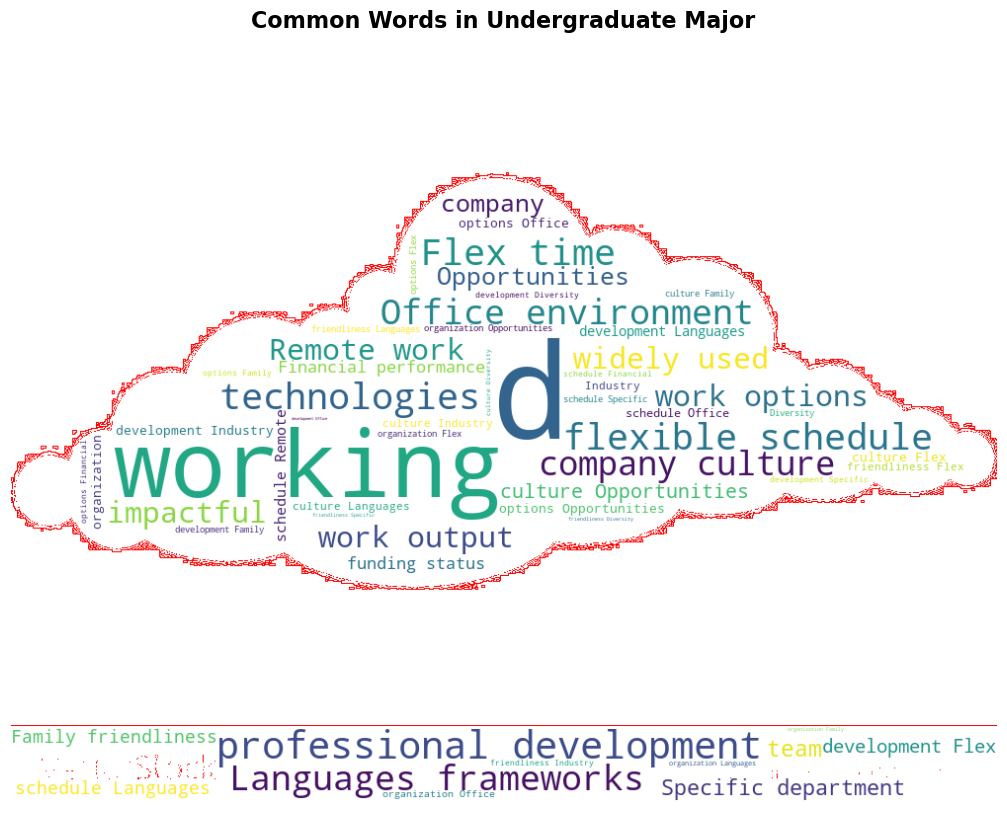

In [40]:
# Wordcloud for dog_breed visualization:
text_t =df_ds.loc[:, 'JobFactors'].str.cat(others=None, sep=' ')

# Read the mask image
grad_mask = np.array(Image.open('cloud_.jpg'))

# Instantiate word cloud object
wc = WordCloud(background_color='white', max_words=500, mask=grad_mask, stopwords=STOPWORDS,
              width=640, height=480,contour_width=.01, 
                      contour_color='red')
# Generate word cloud
wc.generate(text_t)
# Show word cloud
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words in Undergraduate Major', fontsize=16, weight='bold')
plt.axis('off');

In [41]:
undergrad_df= compare(df_ds, df_20, 'UndergradMajor')
undergrad_df

,data,all
"Computer science, computer engineering, or software engineering",0.502691,0.619316
Another engineering discipline,0.121905,0.093225
Mathematics or statistics,0.119214,0.036258
A natural or health science,0.110065,0.048181
"Information technology, networking, or system administration",0.051399,0.079831
A social science,0.034715,0.018296
A business discipline,0.029333,0.026963
A humanities or arts discipline,0.019376,0.033964
Web development or web design,0.008073,0.035082
I never declared a major,0.003229,0.008883


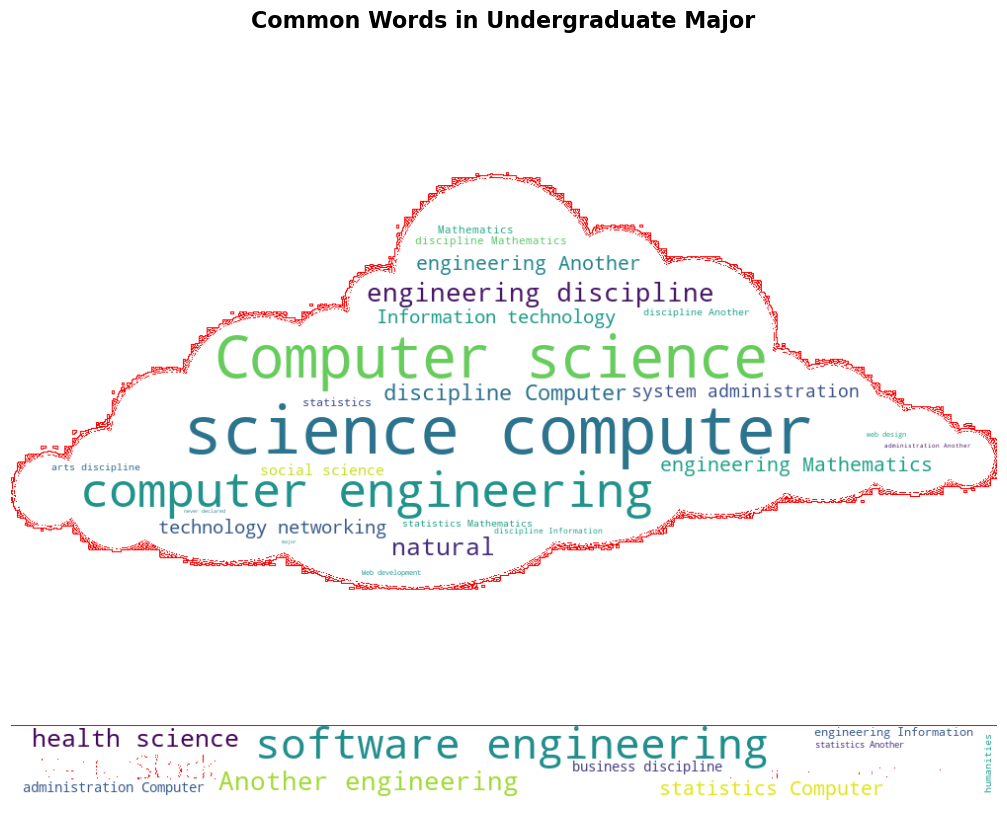

In [42]:
# Wordcloud for dog_breed visualization:
text_t =df_ds.loc[:, 'UndergradMajor'].str.cat(others=None, sep=' ')

# Read the mask image
grad_mask = np.array(Image.open('cloud_.jpg'))

# Instantiate word cloud object
wc = WordCloud(background_color='white', max_words=500, mask=grad_mask, stopwords=STOPWORDS,
              width=640, height=480,contour_width=.01, 
                      contour_color='red')
# Generate word cloud
wc.generate(text_t)
# Show word cloud
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Common Words in Undergraduate Major', fontsize=16, weight='bold')
plt.axis('off');

#### Gender gap 

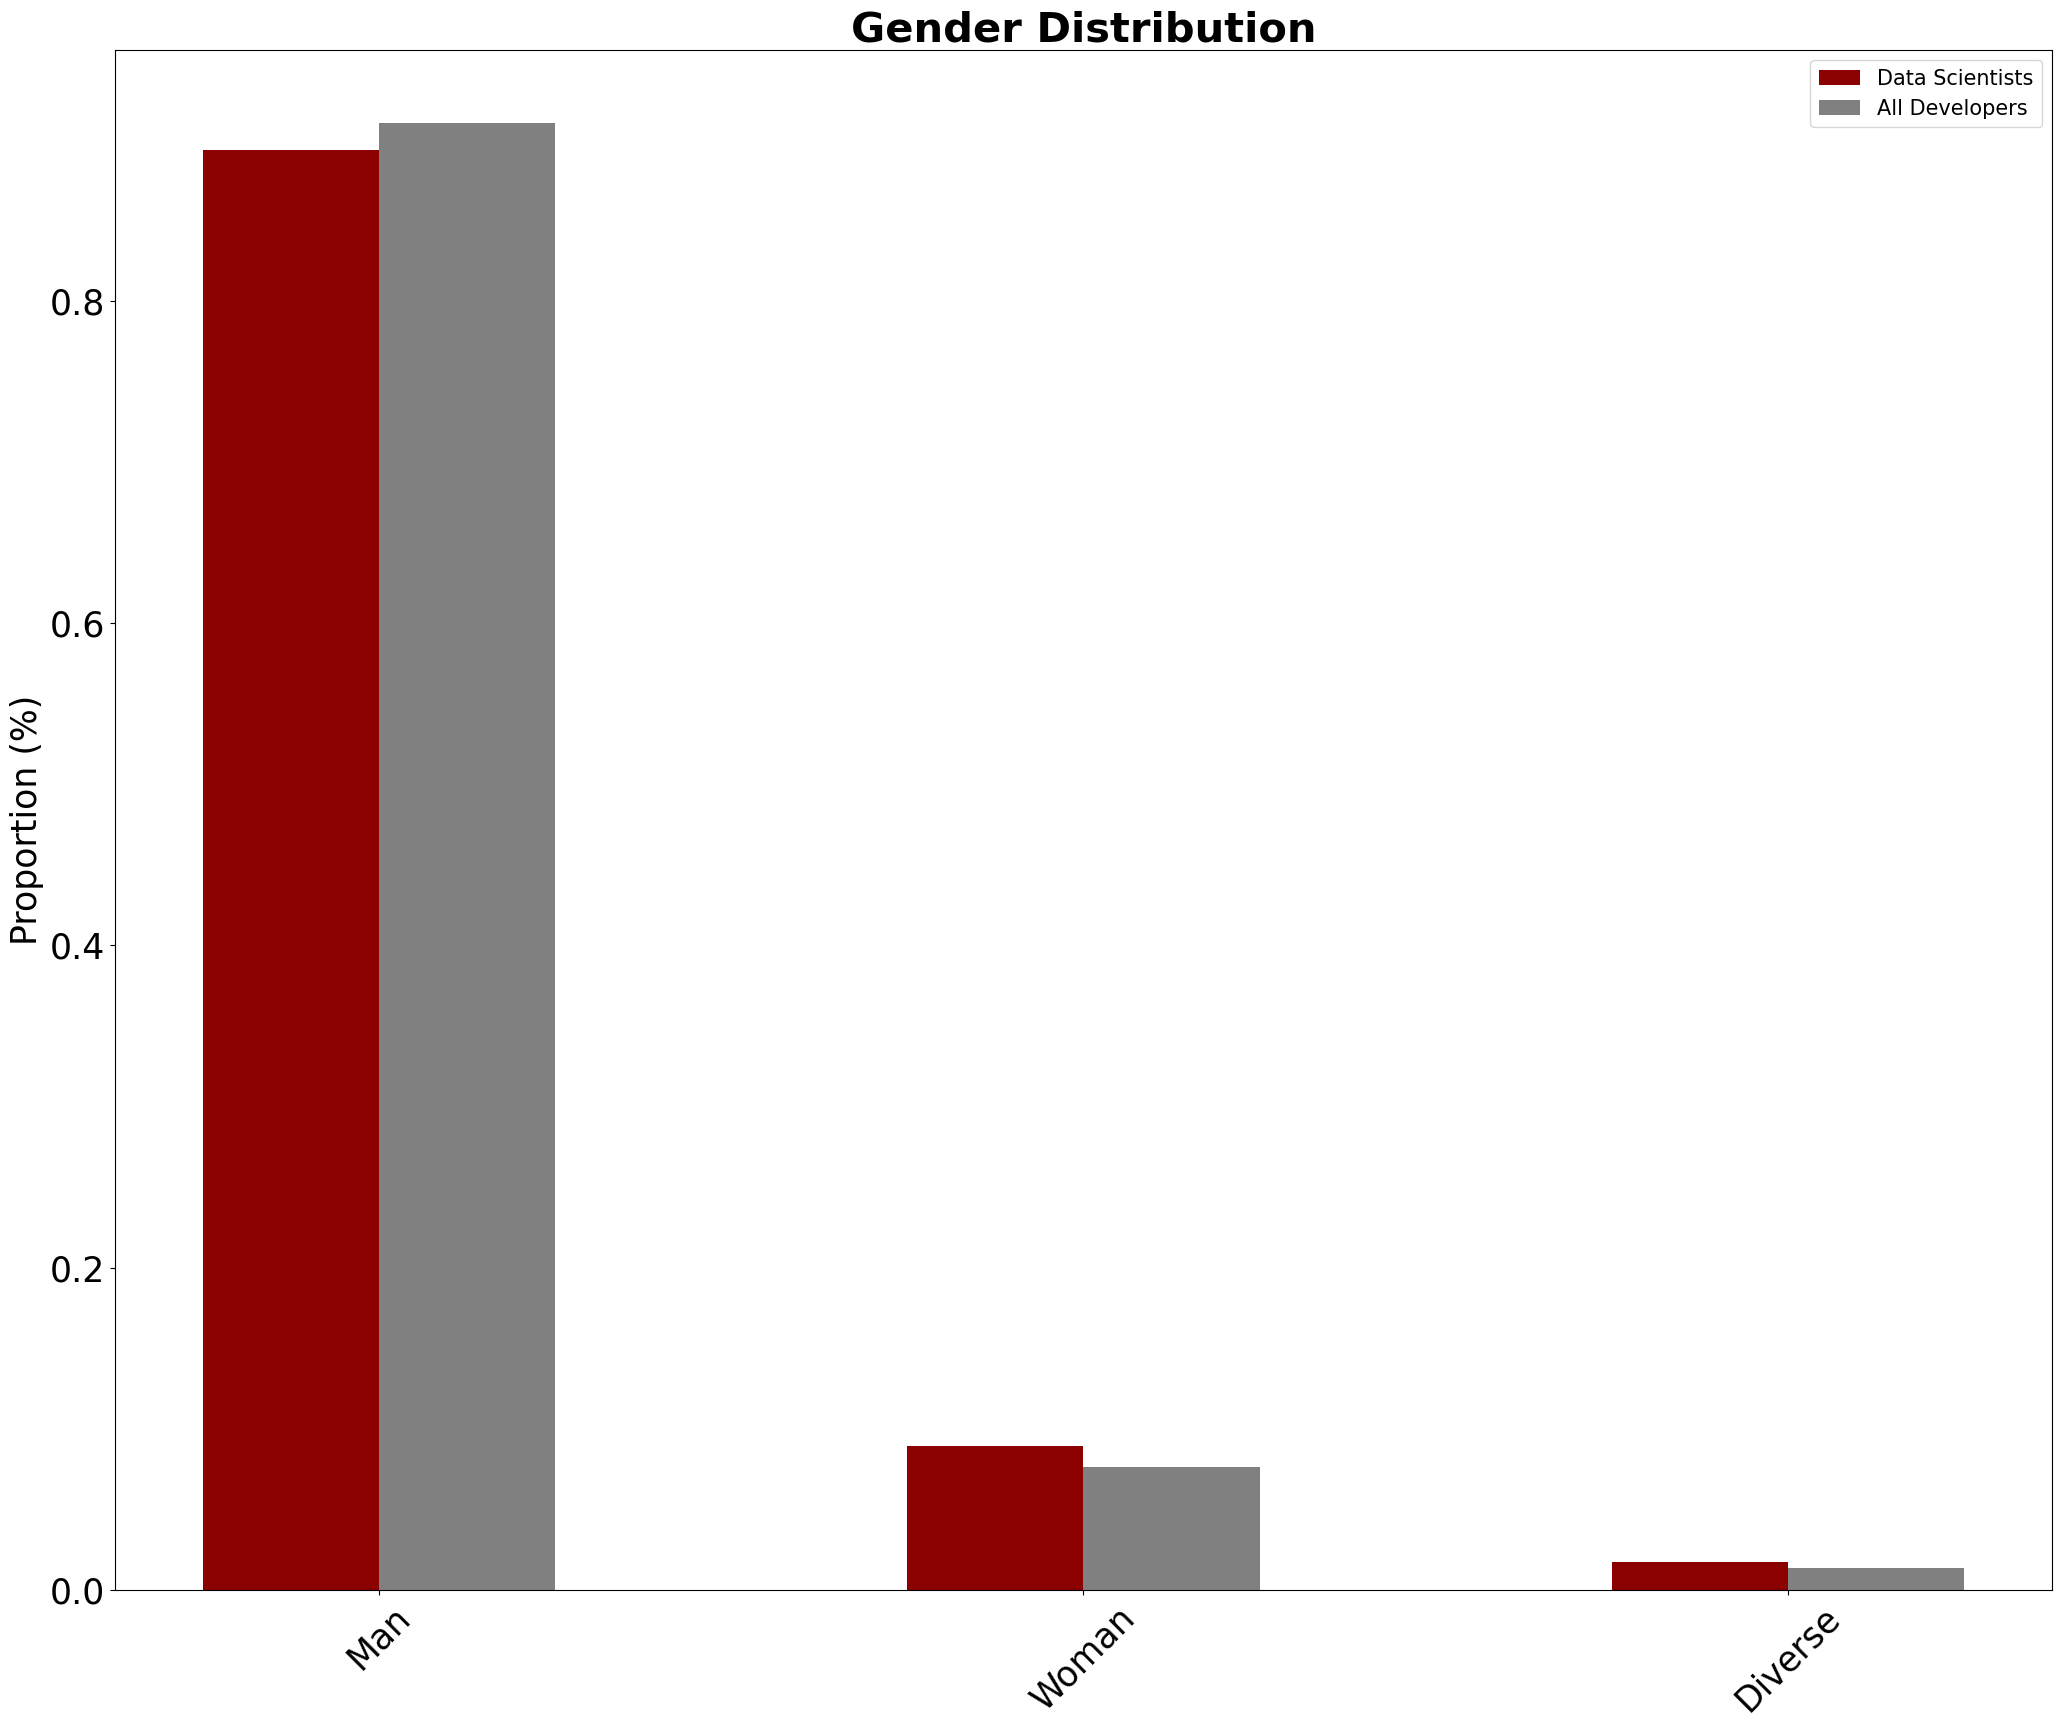

In [43]:
gender_df= compare(df_ds, df_20, 'Gender')
compare_plot(gender_df, 'Gender Distribution')

In [44]:
gender_df

,data,all
Man,0.893337,0.910121
Woman,0.089421,0.076033
Diverse,0.017241,0.013846


##### Languages used by Data Scientist

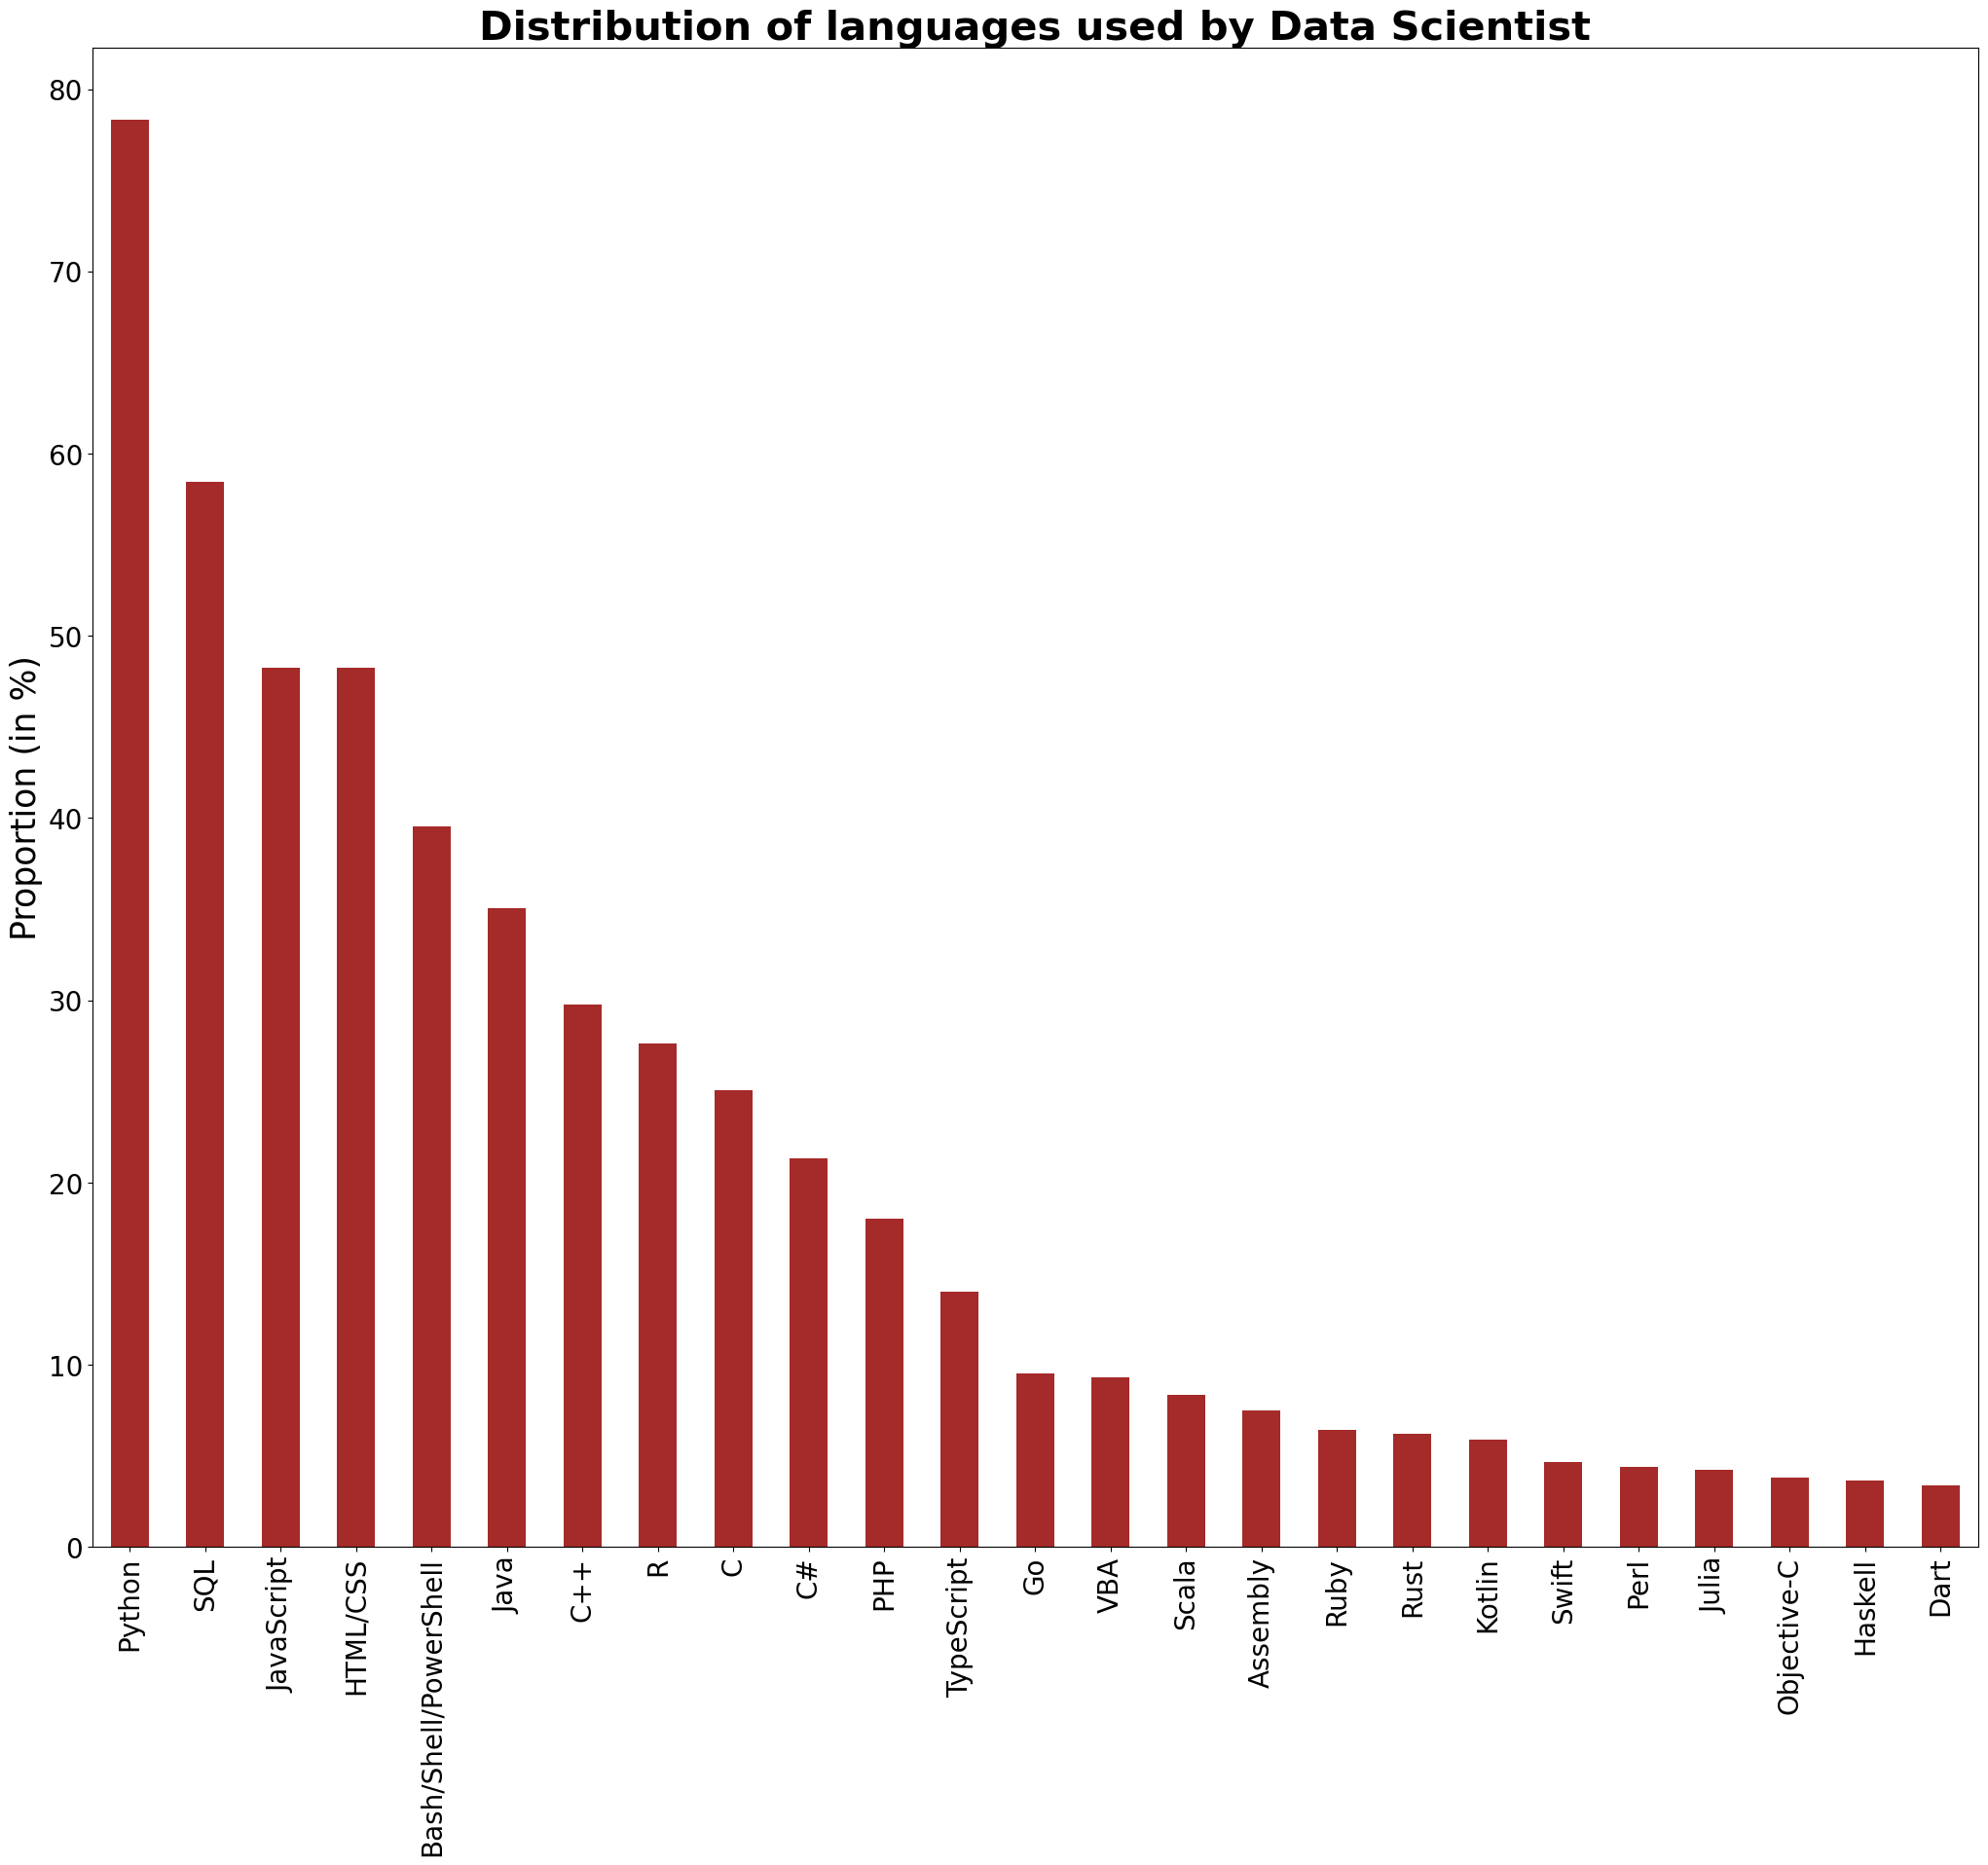

In [45]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
# Explode 'DevType' column to get proportion of all developer types for 2020
lang_dist = df_ds.LanguageWorkedWith.str.split(';').explode().value_counts(
    normalize=True, dropna=False)*100

# Multiply by len/len(df)to take into account multiple rows for one respondent in exploded df
lang_dist *= len(df_ds.LanguageWorkedWith.str.split(';').explode())/len(df_ds)

# Drop NaN category from series
lang_dist.drop(np.nan, inplace=True)


# Visualize Proportion of Developer Types in 2020
plt.figure(figsize=(25,20))
ax = lang_dist.plot(kind='bar', color='brown')
# ax.invert_yaxis()

ax.set_title('Distribution of languages used by Data Scientist', fontsize=30, weight='bold')
ax.set_ylabel('Proportion (in %)', fontsize=25);

##### Salary vs year of coding 

In [46]:
# Get dataframes of some of the rest developer types
df_devops = df_20[df_20['DevType'].str.contains("DevOps ",na=False)]
df_fullstack = df_20[df_20['DevType'].str.contains("full-stack",na=False)]
df_frontend = df_20[df_20['DevType'].str.contains("front-end",na=False)]
df_sre = df_20[df_20['DevType'].str.contains("reliability",na=False)]
df_designer = df_20[df_20['DevType'].str.contains("Designer",na=False)]
df_mobile = df_20[df_20['DevType'].str.contains("mobile",na=False)]
df_sysad = df_20[df_20['DevType'].str.contains("System administrator",na=False)]
df_qa = df_20[df_20['DevType'].str.contains("QA",na=False)]
df_deng=df_20[df_20['DevType'].str.contains("Engineer, data",na=False)]
df_da = df_20[df_20['DevType'].str.contains("analyst",na=False)]


# Choose some to plot in order to compare
dev_dataframes = [df_ds, df_devops, df_fullstack, df_frontend , df_sre, df_designer, df_mobile, df_sysad, df_deng, df_da]
dev_roles = ["Data Scientist", "DevOps Specialist", "Full-stack Developer", "Front-End Developer",
            "Site Reliability Engineer", "Designer", "Mobile Developer", "System Administrator",
            "Data Engineer", "Data Analyst"]

In [47]:
# Remove nulls from  each the developer dataframes
for d in dev_dataframes:
    d = d.dropna(subset=['ConvertedComp', 'YearsCodePro'])
    
def get_count(df):
    '''
    INPUT - df - pandas dataframe that we want to find size of
    OUTPUT - count - int -  number of rows in df
    '''
    return df.shape[0]
    
# Get count of different developer roles
dev_count = []

for d in dev_dataframes:
    dev_count.append(get_count(d))


In [48]:
# Helper functions for the plots
def get_median_salaries(dev_dataframes):
    '''
    INPUT - dev_dataframes - list of pandas dataframes for each dev type
    OUTPUT - salaries - list of median salary (int) in USD per year for each dev type
    '''
    
    salaries = []
    for d in dev_dataframes:
        salaries.append(d['ConvertedComp'].median())
    return salaries

In [49]:
def get_avg_years(dev_dataframes):
    '''
    INPUT - dev_dataframes - list of pandas dataframes for each dev type
    OUTPUT - years - list of average years of professional coding experience for each dev type
    '''
    
    years = []
    for d in dev_dataframes:
        years.append(d['YearsCodePro'].mean())
    return years

In [50]:
def get_avg_satisfaction(dev_dataframes):
    '''
    INPUT - dev_dataframes - list of pandas dataframes for each dev type
    OUTPUT - years - list of average years of professional coding experience for each dev type
    '''
    
    satis = []
    for d in dev_dataframes:
        satis.append(d['JobSat'].mean())
    return satis


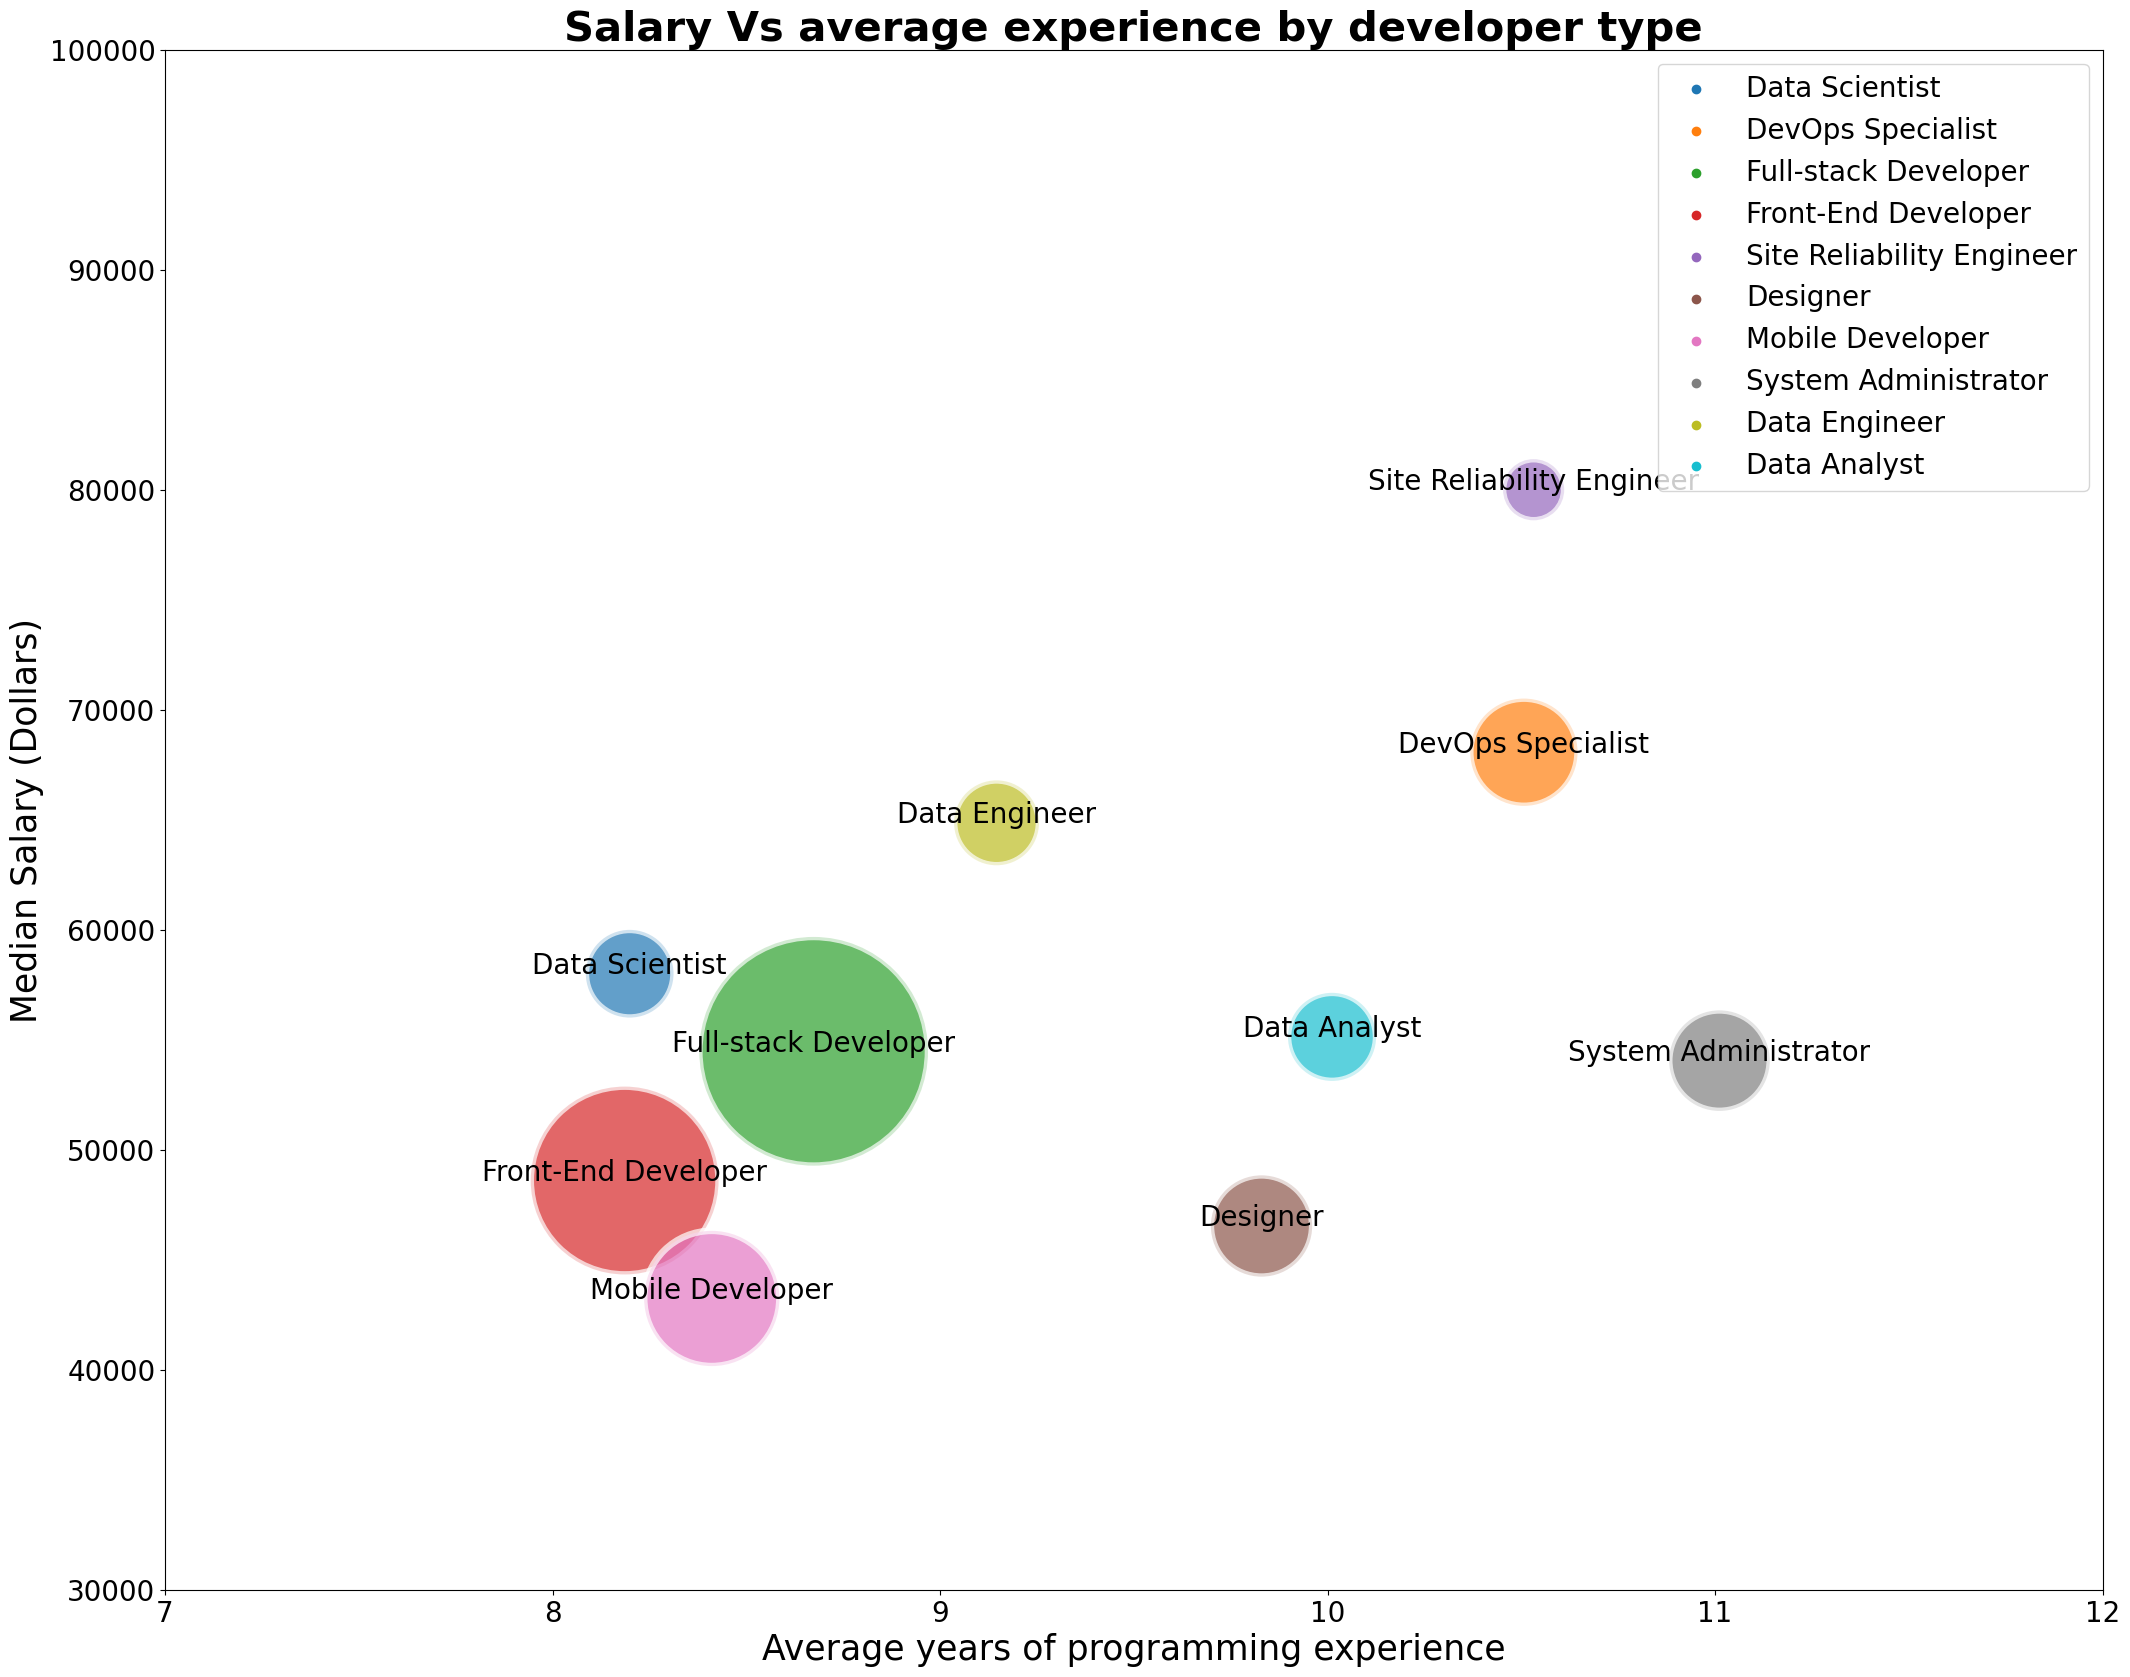

In [51]:

salaries = get_median_salaries(dev_dataframes)
years = get_avg_years(dev_dataframes)

salary_df = pd.DataFrame({
    'Count':  dev_count,
    'Salary': salaries,
    'Years':  years,
    'Type':   dev_roles
})

# Create scatter plot of ratio men to women for different developer roles

plt.figure(figsize = (25,20))

# Size of bubbles (s) corresponds to the number of respondents for each developer role
ax = sb.scatterplot(salary_df.Years, salary_df.Salary, alpha = 0.7,  s=salary_df.Count, 
                     hue=salary_df.Type)

# ax.set(xlabel='Average years of programming experience', ylabel='Median Salary (Dollars)', 
#        title='Salary Vs average experience by developer type')

ax.axis([7, 12, 30000, 100000])
ax.set_ylabel('Median Salary (Dollars)', fontsize=25)
ax.set_xlabel('Average years of programming experience',fontsize=25)
ax.set_title('Salary Vs average experience by developer type', fontsize=30, weight='bold')
ax.legend(loc='best', fontsize=20)

# For each point, we add a text inside the bubble
for line in range(0, salary_df.shape[0]):
     ax.text(salary_df.Years[line], salary_df.Salary[line], salary_df.Type[line], horizontalalignment='center', fontsize=20)

plt.show()

In [52]:
df_20.ConvertedComp.median()

54049.0

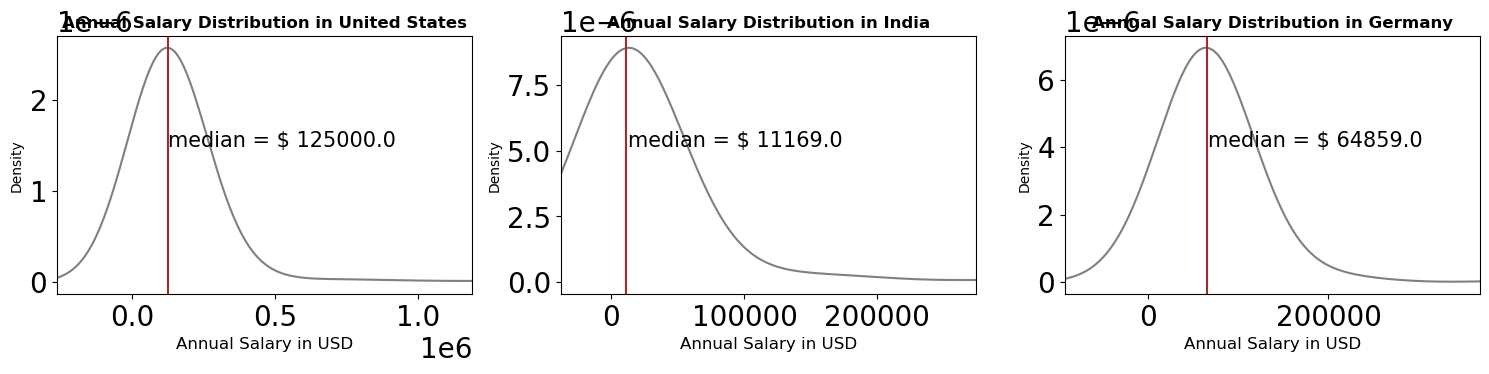

In [53]:
# now lets plot salary distributions for the top 10 countries

fig = plt.figure(figsize=(15,10))

countries = df_ds['Country'].value_counts().sort_values(ascending=False)[:3].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = df_ds.loc[df_ds['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde', color='gray')
    ax.axvline(temp_salaries.median(), linestyle = '-', color = 'brown')
    ax.text((temp_salaries.median() + 1500), (float(ax.get_ylim()[1])*0.55), 'median = $ ' + str(round(temp_salaries.median(),0)), fontsize = 15)
    ax.set_xlabel('Annual Salary in USD', fontsize = 12)
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Annual Salary Distribution in {}'.format(country), weight='bold')

plt.tight_layout()
plt.show()

In [54]:
# pd.read_csv('developer_survey_2020/survey_results_public.csv').to_excel('test.xlsx')

## Conclusion

The main conclusions of the code can be found at the post available [here](https://medium.com/analytics-vidhya/do-you-dream-of-becoming-a-data-scientist-here-all-what-you-should-know-about-your-dream-job-f47296096b90)